<font size="+3">Module 58 - Crop Recommendation</font>

In this notebook, we will create a crop recommendation system and we will:
- We will be following the AI Project Cycle for the entire project. An AI Project Cycle helps to create solutions efficiently, quickly and have an overview of the entire process.
- We further proceed step-wise starting from defining a problem, acquiring data, exploring it, and then we model the data
- Finally we evaluate the model.This helps to have effective solution for the problem.

## AI Project Cycle
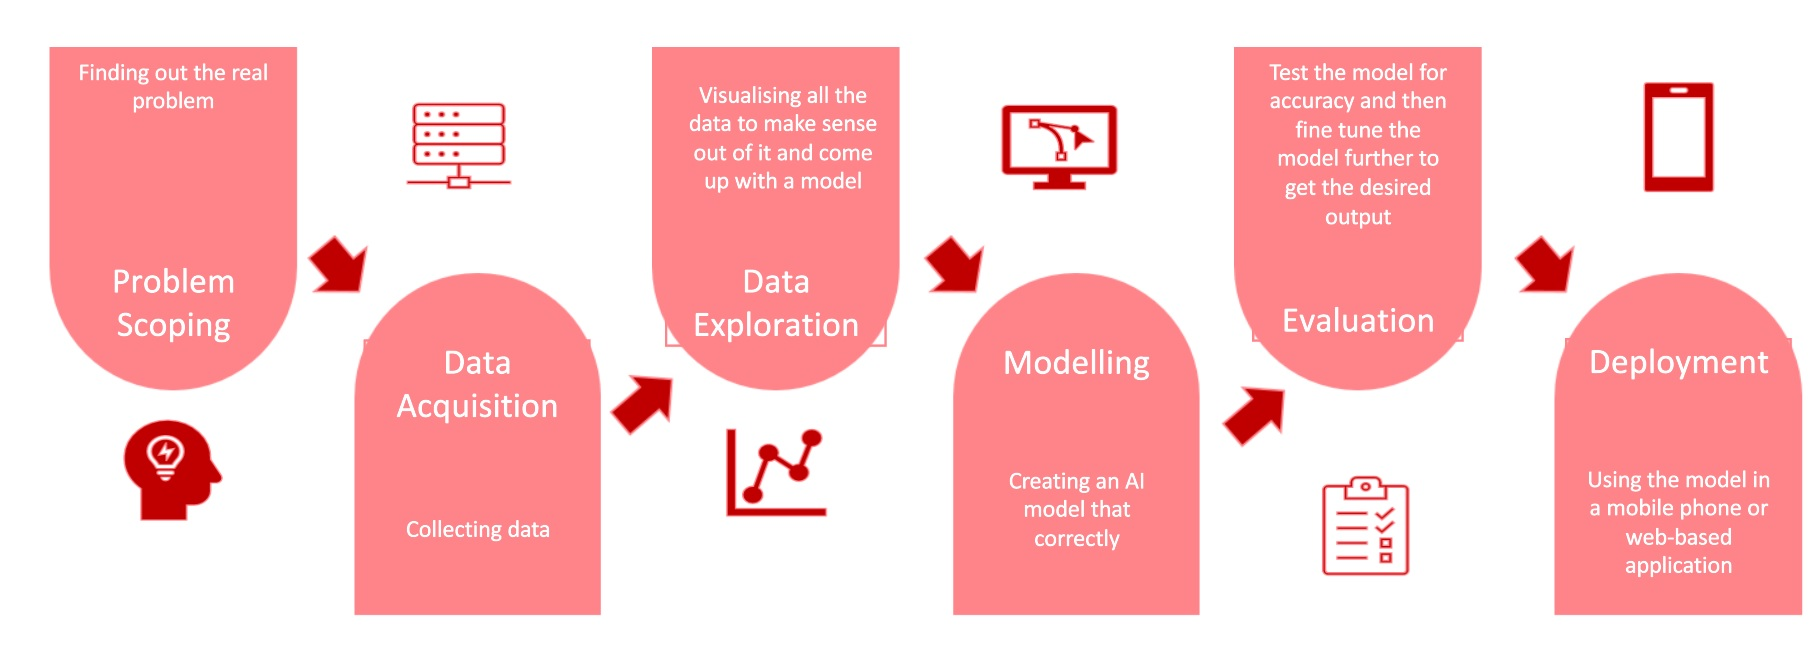

## Context: Understanding the Problem Statement --------Problem Scoping (AI Project Cycle - Step 1)

Crop Recommendation Dataset

ML can be used to predict the crop that can be grown based on some natural features. The dataset is built by augmenting data of rainfall, climate and fertilizer data available for India which can be used to build a predictive model to recommend the most suitable crops to grow in a particular farm.

### Import the useful Packages & Libraries

In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Dataset:  Data Acquisition (AI Project Cycle - Step 2)

The data set is called Crop recommendation Dataset.It can be downloaded from this link: https://www.kaggle.com/code/ysthehurricane/crop-recommendation-system-using-lightgbm/data?select=Crop_recommendation.csv

It consists of  various  features which are:

N - ratio of Nitrogen content in soil
P - ratio of Phosphorous content in soil
K - ratio of Potassium content in soil
temperature - temperature in degree Celsius
humidity - relative humidity in %
ph - ph value of the soil
rainfall - rainfall in mm

### Load/Read the Dataset

In [2]:
#importing the dataset
crop = pd.read_csv("Dataset/Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### View the information of data

In [3]:
#copying original data
data = crop.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Range Index is 2200 and there are 2200 non-null values for every column features which means there are no null entries and therefore we need not deal with missing values. 

## Data Preprocessing ------ Data Exploration(AI Project Cycle - Step 3)

**Data Preprocessing consists of EDA/Data Cleaning/Feature Engineering**

We have listed below all the basic steps involved in Data Pre-processing but we may not require all of them for all problems. It will depend on the nature of the dataset in hand.. you will have to figure out which steps are essential for your problem statement. 

**In this particular problem, will be using steps - 
EDA and Feature Engineering**

-----------------------------------------------------------------------------------------------------------------------------

**Exploratory Data Analysis (EDA)** - goal is to maximize the insight into a dataset and understand the underlying structure of a dataset.

1.	Explore the data- view the information of data
2.	Check how many rows and columns does the data consist of
3.	Find null values/missing values
4.	Fill the missing values- use fillna (mean,median or mode)
5.	Convert categorical values to numerical values if required (one hot encoding, label encoders)
6.	Data scaling/standardization

**Data Cleaning** - goal is to assure that the data is useful,functional and consistent towards the intended end analysis.

1. Remove any ambiguity from the data if any
2. Remove any extra symbols from the data if any for eg -₹2000 $2000 ---> 2000
3. Renaming columns

**Feature Engineering** - goal is to reduce the number of input features to those that are believed to be most useful to a model and thereby speeding up the process.

1. Drop unnecessary features
2. Feature selection/Dimensionality reduction

#### Checking for null values

In [4]:
#checking for null values
data.isnull().sum().any()

False

#### Checking for number of unique values for each classes of each fetures

In [5]:
#checking for unique values
for i in data.columns:
    print("column Name : ",i.upper())
    print("No. of unique values : {} \n".format(data[i].nunique()))
    if(data[i].dtype == 'object'):
        print('Unique values : ',pd.unique(data[i]))

column Name :  N
No. of unique values : 137 

column Name :  P
No. of unique values : 117 

column Name :  K
No. of unique values : 73 

column Name :  TEMPERATURE
No. of unique values : 2200 

column Name :  HUMIDITY
No. of unique values : 2200 

column Name :  PH
No. of unique values : 2200 

column Name :  RAINFALL
No. of unique values : 2200 

column Name :  LABEL
No. of unique values : 22 

Unique values :  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


There are 22 classes in output variable

#### Encoding the categorical variable

In [6]:
#label encoding for output variable
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
data['Encoded_label'] = encod.fit_transform(data.label) #label will be encoded in alphabetical order

#### Viewing the encoded dataframe

In [7]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Encoded_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


In [8]:
#encoded labels for classes 
a = pd.DataFrame(pd.unique(data.label));
a.rename(columns={0:'label'},inplace=True)
b = pd.DataFrame(pd.unique(data.Encoded_label));
b.rename(columns={0:'encoded'},inplace=True)
classes = pd.concat([a,b],axis=1).sort_values('encoded').set_index('label')
classes

,encoded
label,
apple,0
banana,1
blackgram,2
chickpea,3
coconut,4
coffee,5
cotton,6
grapes,7
jute,8


In [9]:
#fetching the label for given encoded value
a=12
for i in range(0,len(classes)):
    if(classes.encoded[i]==a):
        print(classes.index[i].upper())

MANGO


In [10]:
#dropping duplicate values
data = data.drop_duplicates()

#### Data exploration

<AxesSubplot:>

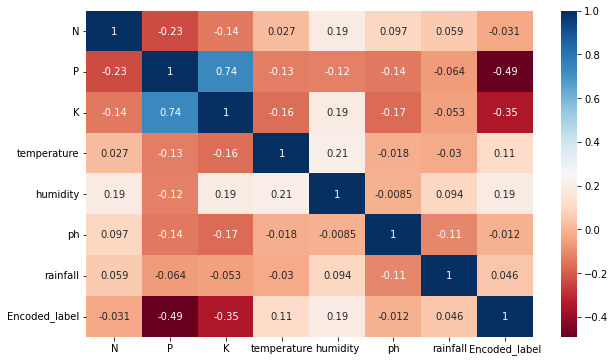

In [11]:
#checking the corelation
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')

From the above diagram, the variable 'K' and 'P' have high positive corelation

In [12]:
#EDA
data.describe()

,N,P,K,temperature,humidity,ph,rainfall,Encoded_label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


Variable Name : N


d:\my internships\sustainable living labs\openvino_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


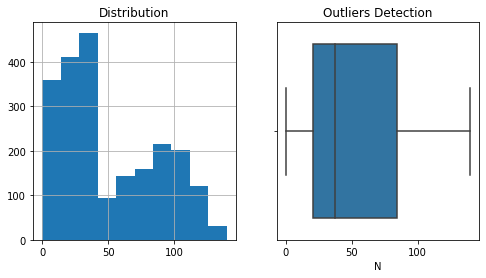

d:\my internships\sustainable living labs\openvino_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(




Variable Name : P


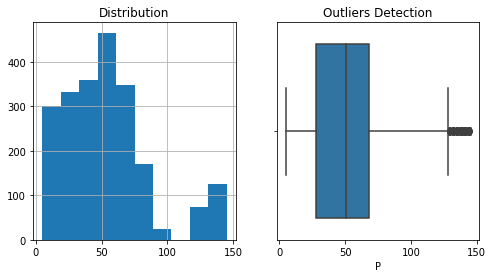



Variable Name : K


d:\my internships\sustainable living labs\openvino_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


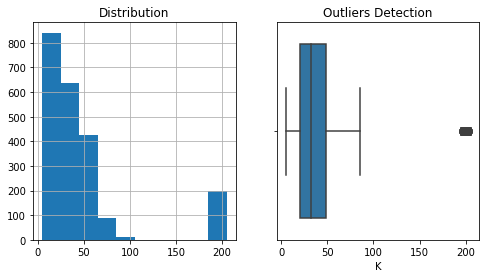



Variable Name : TEMPERATURE


d:\my internships\sustainable living labs\openvino_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


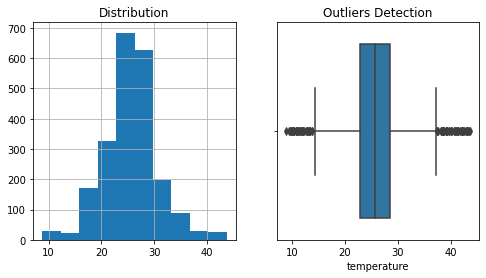



Variable Name : HUMIDITY


d:\my internships\sustainable living labs\openvino_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


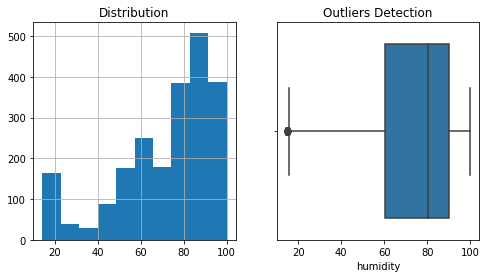



Variable Name : PH


d:\my internships\sustainable living labs\openvino_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


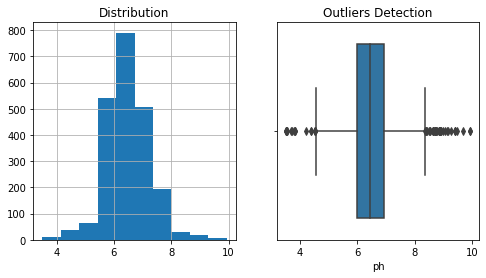



Variable Name : RAINFALL


d:\my internships\sustainable living labs\openvino_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


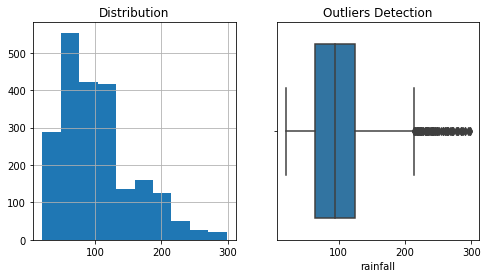

In [13]:
#checking for outliers in the data
for i in data.columns[:-2]:
    print('Variable Name :',i.upper())
    fig, axes = plt.subplots(1,2,figsize=(8,4))
    axes[0].set_title('Distribution')
    axes[1].set_title('Outliers Detection')
    data[i].hist(ax=axes[0])
    sns.boxplot(data[i],ax=axes[1])
    plt.show()
    print('\n')

Variable : N


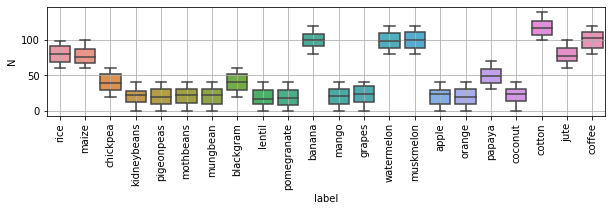

Variable : P


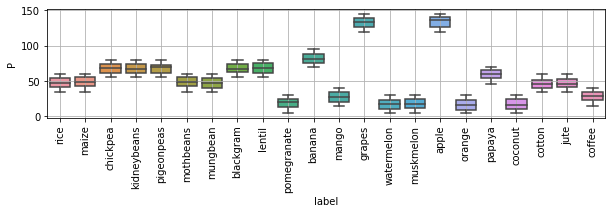

Variable : K


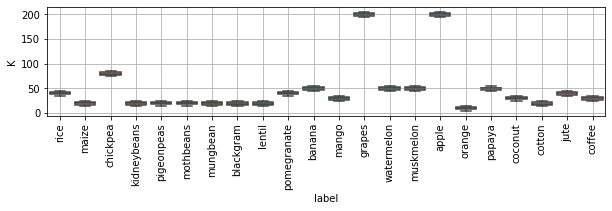

Variable : TEMPERATURE


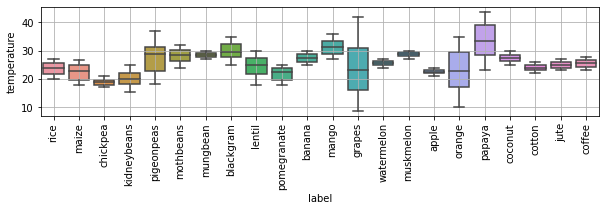

Variable : HUMIDITY


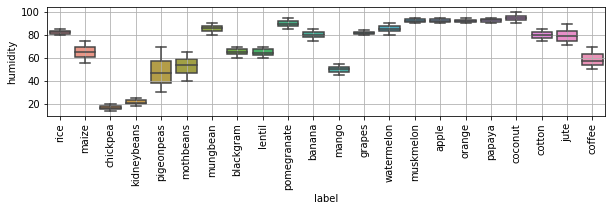

Variable : PH


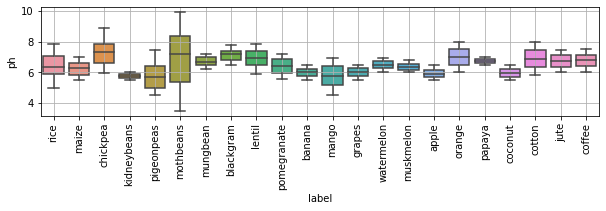

Variable : RAINFALL


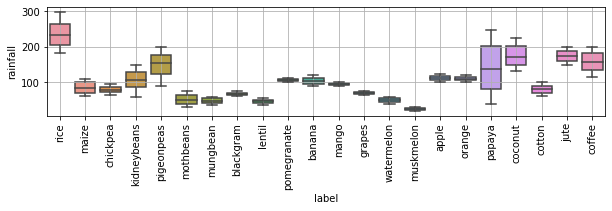

In [14]:
#plotting effect of input variable with output variable
for i in data.columns[:-2]:
    plt.figure(figsize=(10,2))
    print('Variable :',i.upper())
    sns.boxplot(x=data.label,y=data[i])
    plt.grid()
    plt.xticks(rotation=90)
    plt.show()

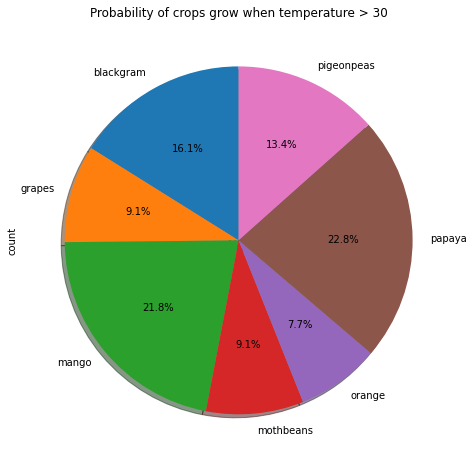

In [15]:
#which crops can grow at higher temperature .i.e., temperature > 30
x = pd.DataFrame(pd.crosstab(data.label[data.temperature > 30],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when temperature > 30')
plt.show()

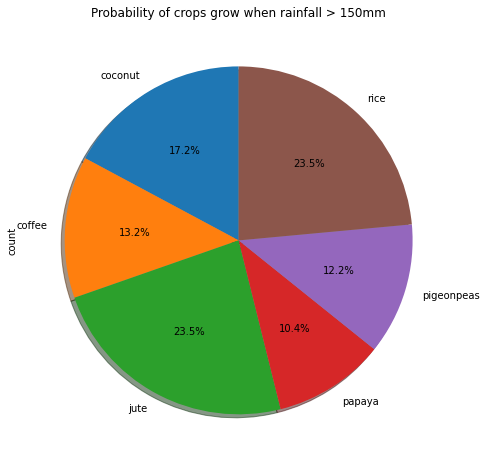

In [16]:
#which crops can grow at higher rainfall .i.e., rainfall > 150mm
x1 = pd.DataFrame(pd.crosstab(data.label[data.rainfall > 150],'count',normalize=True)*100)
x1.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when rainfall > 150mm')
plt.show()

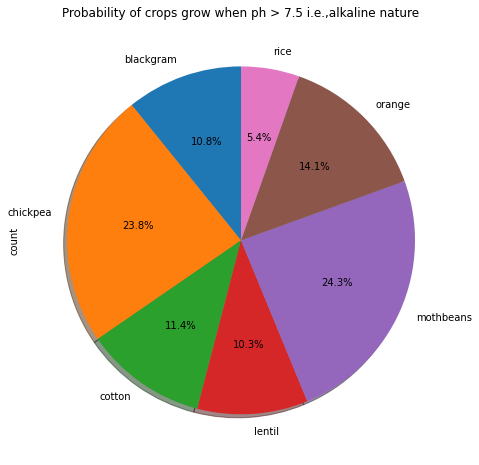

In [17]:
#which crops can grow at higher ph value .i.e., (alkaline nature) ph > 7.5
x = pd.DataFrame(pd.crosstab(data.label[data.ph > 7.5],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when ph > 7.5 i.e.,alkaline nature')
plt.show()

#### #Separating the dependent and independent variables

In [18]:
#Splitting the data into input and output
x = data.iloc[:,:-2]
y = data.Encoded_label
print('Input variables \n',x.head())
print('\nOutput Variable\n',y.head())

Input variables 
     N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

Output Variable
 0    20
1    20
2    20
3    20
4    20
Name: Encoded_label, dtype: int32


#### Train-test split

In [19]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print('Shape of Splitting :')
print('x_train = {}, x_test = {}, y_train = {}, y_test = {}'.format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

Shape of Splitting :
x_train = (1760, 7), x_test = (440, 7), y_train = (1760,), y_test = (440,)


## Building Logistic regression model

In [20]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

d:\my internships\sustainable living labs\openvino_env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\my internships\sustainable living labs\openvino_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix : 



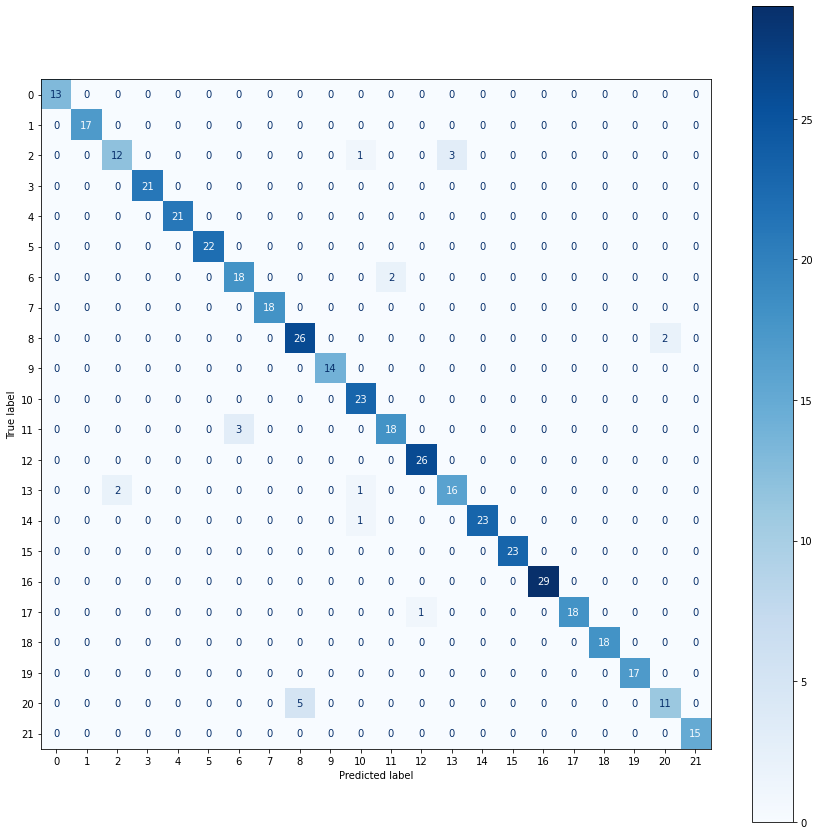

In [21]:
#Initializing the model
logis = LogisticRegression()
pred_logis = logis.fit(x_train,y_train).predict(x_test)
print('Confusion Matrix : \n')
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(logis,x_test,y_test,ax=ax,cmap=plt.cm.Blues)
plt.show()

In [22]:
#classification report
print('REPORT : \n',classification_report(y_test,pred_logis))
acc_logis = accuracy_score(y_test,pred_logis)

REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.86      0.75      0.80        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.86      0.90      0.88        20
           7       1.00      1.00      1.00        18
           8       0.84      0.93      0.88        28
           9       1.00      1.00      1.00        14
          10       0.88      1.00      0.94        23
          11       0.90      0.86      0.88        21
          12       0.96      1.00      0.98        26
          13       0.84      0.84      0.84        19
          14       1.00      0.96      0.98        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17    

## Building RandomForest model

In [23]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier

In [24]:
#initializing the model and fitting for train data
rand = RandomForestClassifier()
pred_rand = rand.fit(x_train,y_train).predict(x_test)
acc_rand = accuracy_score(y_test,pred_rand)
acc_rand

0.9931818181818182

In [25]:
rand.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [26]:
#selecting parameters using GridSearchCV
param = {'n_estimators':range(10,50,10),
         'criterion':['gini'],
         'max_depth':range(1,20,2),
         'max_features':[1,2,3],
         'min_samples_leaf':range(1,10,2),
         'min_samples_split':range(1,40,10)}
grid_rand = GridSearchCV(rand,param,cv=5,n_jobs=-1,verbose=1)
grid_rand.fit(x_train,y_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


d:\my internships\sustainable living labs\openvino_env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3000 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "d:\my internships\sustainable living labs\openvino_env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\my internships\sustainable living labs\openvino_env\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "d:\my internships\sustainable living labs\openvino_env\lib\site-packages\joblib\paral

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(1, 20, 2),
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(1, 40, 10),
                         'n_estimators': range(10, 50, 10)},
             verbose=1)

In [27]:
print(grid_rand.best_params_)
print(grid_rand.best_score_)

{'criterion': 'gini', 'max_depth': 19, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 40}
0.9965909090909092


Confusion Matrix : 



d:\my internships\sustainable living labs\openvino_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


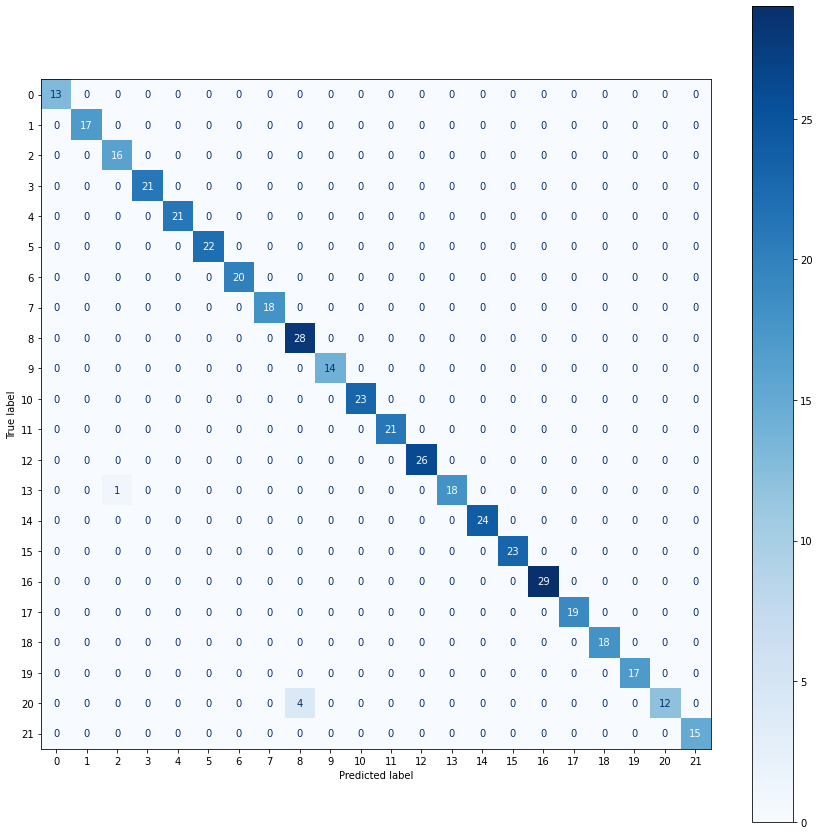

In [28]:
#predicting for test data and plotting confusion matrix
pred_rand = grid_rand.predict(x_test)
print('Confusion Matrix : \n')
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(grid_rand,x_test,y_test,ax=ax,cmap=plt.cm.Blues)
plt.show()

In [29]:
#classification report
print('REPORT : \n',classification_report(y_test,pred_rand))

REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.88      1.00      0.93        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17    

## Building XG Boost model

In [30]:
from xgboost import XGBClassifier

Confusion Matrix : 



d:\my internships\sustainable living labs\openvino_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


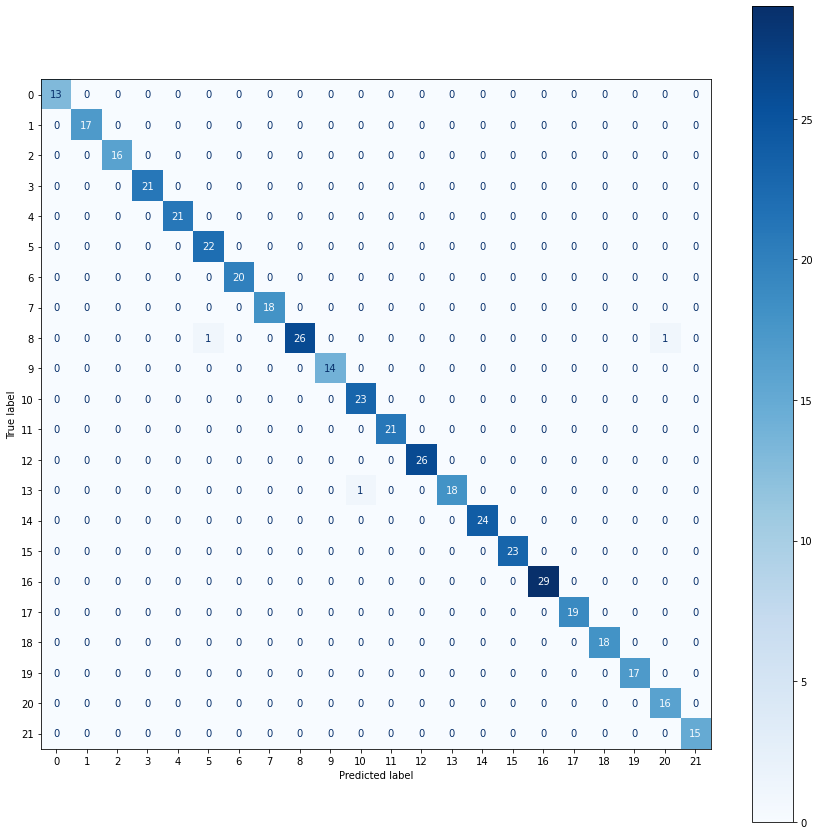

In [31]:
#initializing the model and fitting for train data
xgb = XGBClassifier()
pred_xgb = xgb.fit(x_train,y_train).predict(x_test)
acc_xgb = accuracy_score(y_test,pred_xgb)
#plotting confusion matrix
print('Confusion Matrix : \n')
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(xgb,x_test,y_test,ax=ax,cmap=plt.cm.Blues)
plt.show()

In [32]:
#classification report
print('REPORT : \n',classification_report(y_test,pred_xgb))

REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       1.00      0.93      0.96        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17    

In [33]:
#importing pickle file
import pickle
pickle_out = open('classifier2.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [34]:
a = [[80,35,40,30,80,7.5,100]]

In [35]:
pickle_in = open('classifier.pkl','rb')
model = pickle.load(pickle_in)
pre = model.predict_proba(a)
pre = pd.DataFrame(data = np.round(pre.T*100,2), index=classes.index,columns=['predicted_values'])
pre

d:\my internships\sustainable living labs\openvino_env\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\my internships\sustainable living labs\openvino_env\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\my internships\sustainable living labs\openvino_env\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 

,predicted_values
label,
apple,0.00
banana,17.50
blackgram,0.00
chickpea,0.00
coconut,0.00
coffee,5.50
cotton,10.00
grapes,0.00
jute,27.13


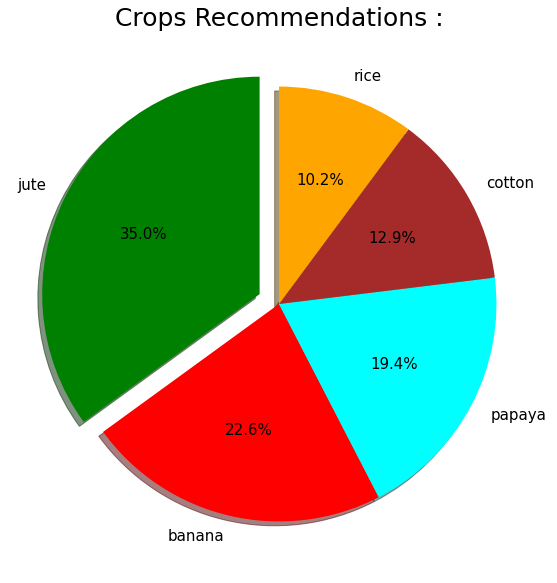

In [36]:
high = pre.predicted_values.nlargest(5)
plt.figure(figsize=(15,10))
plt.rcParams['font.size']=15
plt.title('Crops Recommendations :',fontdict={'fontsize': 25, 'fontweight': 'medium'})
plt.pie(x=high,labels=high.index,autopct='%1.1f%%',explode=(0.1, 0, 0, 0, 0),shadow=True,startangle=90,
        colors=['green','red','cyan','brown','orange'])

plt.show()